In [280]:
from env import host, username, password
from pydataset import data
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from env import host, username, password
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import os
import acquire
import prepare

In [281]:
churn_db = acquire.get_telco_db('telco_churn')

In [282]:
churn_db.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [4]:
churn_db.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,32.371149,64.761692
std,1.148907,0.833755,0.737796,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,1.000000,2.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [5]:
churn_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

|Target|Datatype|Definition|
|:-------|:--------|:----------|
| churn | 7043 non-null: object | churn: 1 = have churned, 0 = not churned|

In [6]:
churn_db['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [7]:
churn_df = prepare.clean_churn(churn_db)

In [7]:
churn_df['total_charges'] = churn_df['total_charges'].str.replace(' ', '0.00').astype('float64')

In [23]:
churn_df.drop(['customer_id', 'payment_type_id','contract_type_id','internet_service_type_id'], axis = 1, inplace = True)

KeyError: "['customer_id'] not found in axis"

In [8]:
val_col = ['gender', 'senior_citizen', 'partner','dependents','phone_service','multiple_lines','online_security','online_backup', 'device_protection',
           'streaming_tv', 'streaming_movies','paperless_billing', 'churn', 'internet_service_type','contract_type', 'payment_type', 'tech_support']

In [9]:
for x in val_col:
    counts = churn_db[x].value_counts()
    print(f'Counts for {x}\n')
    print(f'{counts}\n') 

Counts for gender

Male      3555
Female    3488
Name: gender, dtype: int64

Counts for senior_citizen

0    5901
1    1142
Name: senior_citizen, dtype: int64

Counts for partner

No     3641
Yes    3402
Name: partner, dtype: int64

Counts for dependents

No     4933
Yes    2110
Name: dependents, dtype: int64

Counts for phone_service

Yes    6361
No      682
Name: phone_service, dtype: int64

Counts for multiple_lines

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

Counts for online_security

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

Counts for online_backup

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

Counts for device_protection

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

Counts for streami

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>


In [10]:
churn_db.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,Female,0,No,No,3,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.85,57.20,No,None,Month-to-month,Mailed check
1,Female,0,Yes,Yes,4,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,Male,0,No,No,27,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.40,529.80,No,None,Month-to-month,Electronic check
3,Male,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,Female,0,Yes,No,10,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


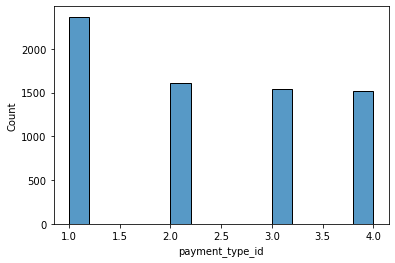

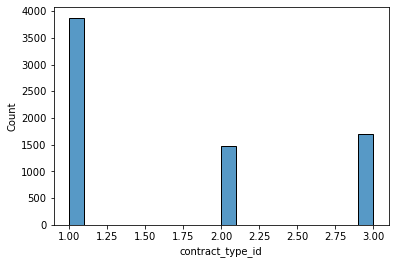

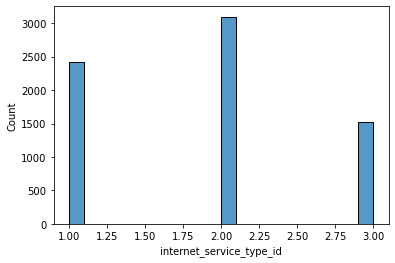

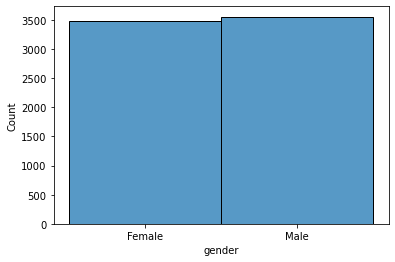

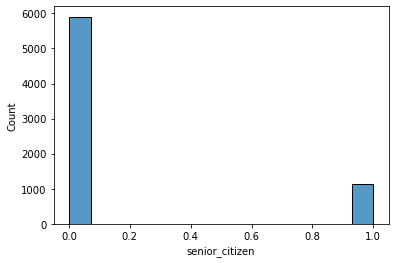

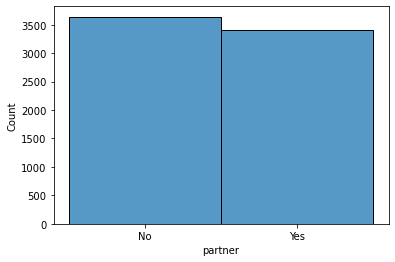

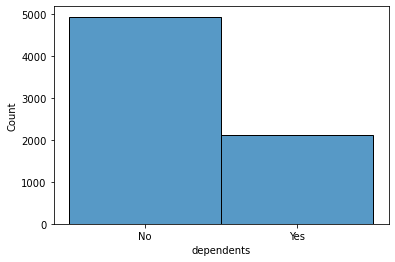

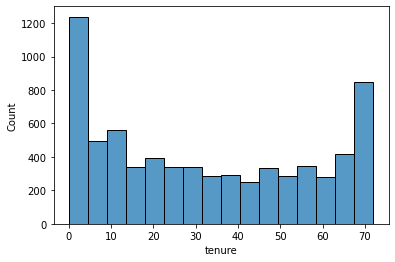

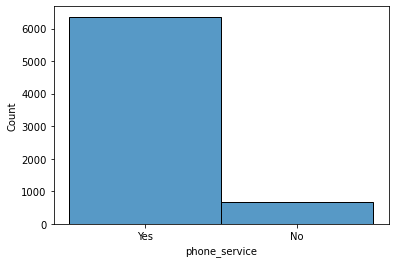

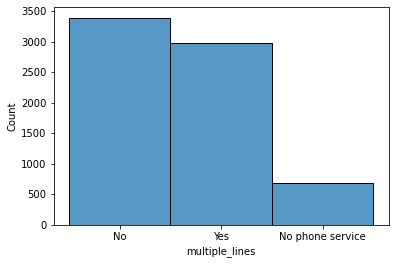

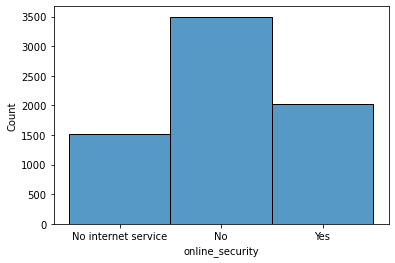

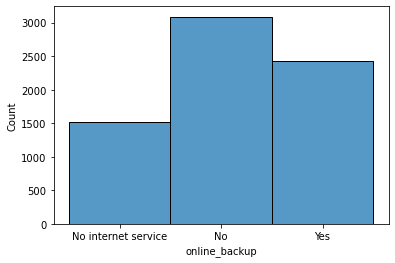

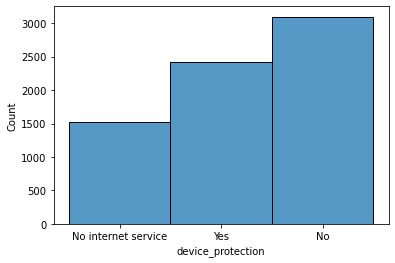

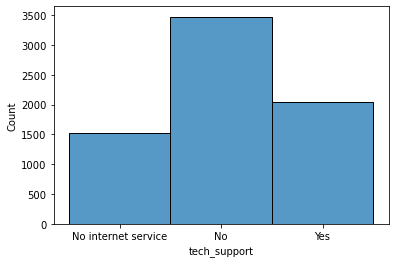

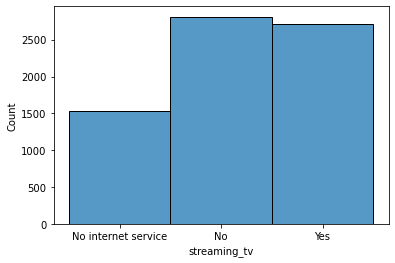

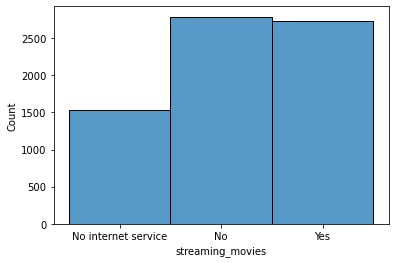

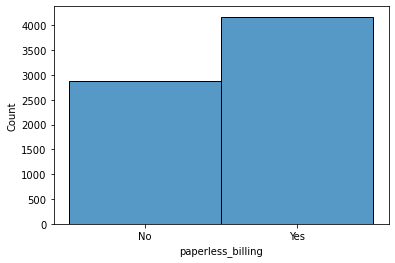

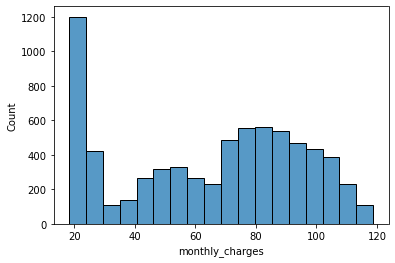

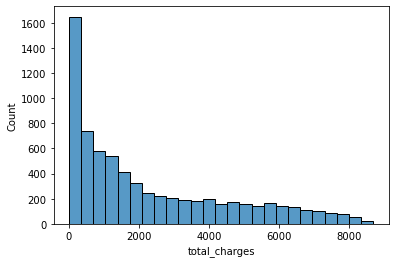

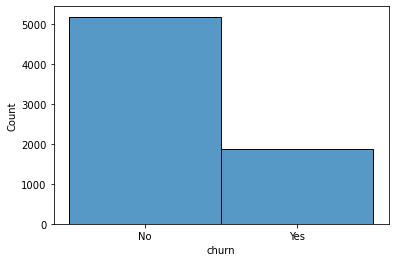

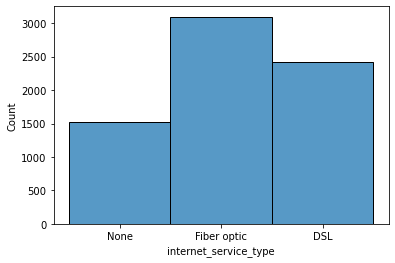

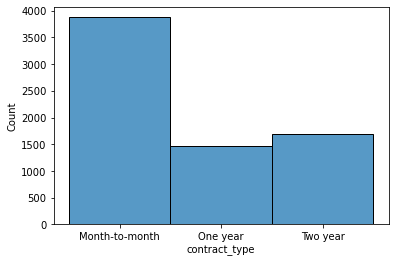

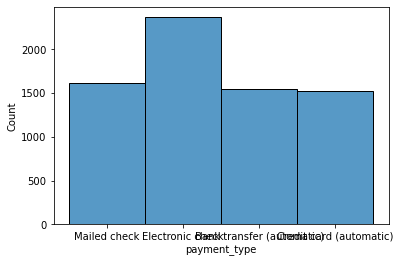

In [12]:
for x in churn_db:
    plt.show(sns.histplot(churn_db[x]))

In [13]:
churn_df = churn_db
label_encoder = LabelEncoder()
for x in churn_db.columns:
    churn_df[x] = label_encoder.fit_transform(churn_db[x])

In [12]:
def encode_values(df):
    label_encoder = LabelEncoder()
    for x in df.columns:
        df[x] = label_encoder.fit_transform(df[x])
    return df

In [13]:
churn_df = prepare.encode_values(churn_db)

In [35]:
for x in val_col:
    counts = churn_db[x].value_counts()
    print(f'Counts for {x}\n')
    print(f'{counts}\n') 

Counts for gender

1    3555
0    3488
Name: gender, dtype: int64

Counts for senior_citizen

0    5901
1    1142
Name: senior_citizen, dtype: int64

Counts for partner

0    3641
1    3402
Name: partner, dtype: int64

Counts for dependents

0    4933
1    2110
Name: dependents, dtype: int64

Counts for phone_service

1    6361
0     682
Name: phone_service, dtype: int64

Counts for multiple_lines

0    3390
2    2971
1     682
Name: multiple_lines, dtype: int64

Counts for online_security

0    3498
2    2019
1    1526
Name: online_security, dtype: int64

Counts for online_backup

0    3088
2    2429
1    1526
Name: online_backup, dtype: int64

Counts for device_protection

0    3095
2    2422
1    1526
Name: device_protection, dtype: int64

Counts for streaming_tv

0    2810
2    2707
1    1526
Name: streaming_tv, dtype: int64

Counts for streaming_movies

0    2785
2    2732
1    1526
Name: streaming_movies, dtype: int64

Counts for paperless_billing

1    4171
0    2872
Name: paper

In [14]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 7043 non-null   int64
 1   senior_citizen         7043 non-null   int64
 2   partner                7043 non-null   int64
 3   dependents             7043 non-null   int64
 4   tenure                 7043 non-null   int64
 5   phone_service          7043 non-null   int64
 6   multiple_lines         7043 non-null   int64
 7   online_security        7043 non-null   int64
 8   online_backup          7043 non-null   int64
 9   device_protection      7043 non-null   int64
 10  tech_support           7043 non-null   int64
 11  streaming_tv           7043 non-null   int64
 12  streaming_movies       7043 non-null   int64
 13  paperless_billing      7043 non-null   int64
 14  monthly_charges        7043 non-null   int64
 15  total_charges          7043 non-null  

In [24]:
scaler = StandardScaler(copy = True)
scale = pd.DataFrame(scaler.fit_transform(churn_df[['monthly_charges','tenure', 'total_charges']]))
scale.columns = ['scale_monthly_charges','scale_tenure', 'scale_total_charges']
scaled = scale.join(churn_df['churn'])

In [65]:
train, validate, test = prepare.train_validate_test_split(churn_df, 'churn')

In [66]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
5707,1,1,1,0,72,1,2,1,1,1,1,1,1,1,92,3537,0,2,2,0
4471,0,0,1,1,56,1,0,0,0,0,0,2,2,0,1071,5387,0,1,1,0
4994,1,1,0,0,60,1,2,2,2,0,0,0,2,1,749,5088,0,0,1,2
3458,0,1,1,0,25,1,2,2,0,0,2,2,0,1,705,3477,0,0,0,1
3818,1,0,0,0,20,1,2,2,0,0,2,0,0,0,528,2750,0,0,0,0


<AxesSubplot:xlabel='variable', ylabel='value'>

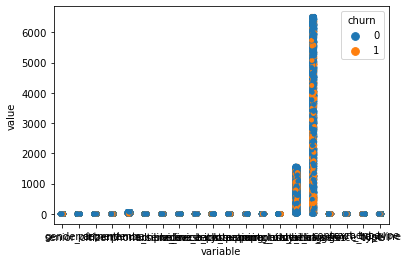

In [95]:
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.churn).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 73.47%


In [80]:
y_col = 'churn'
X_cols = ['contract_type','online_security','tech_support']
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [181]:
heat = train[train.columns.drop(['gender','phone_service','multiple_lines', 'streaming_tv', 'streaming_movies','internet_service_type', 'baseline'])]

In [189]:
pd.DataFrame(churn_heat)

,churn
senior_citizen,0.168635
partner,-0.143688
dependents,-0.170328
tenure,-0.348683
online_security,-0.279729
online_backup,-0.188836
device_protection,-0.184284
tech_support,-0.275637
paperless_billing,0.197053
monthly_charges,0.186297


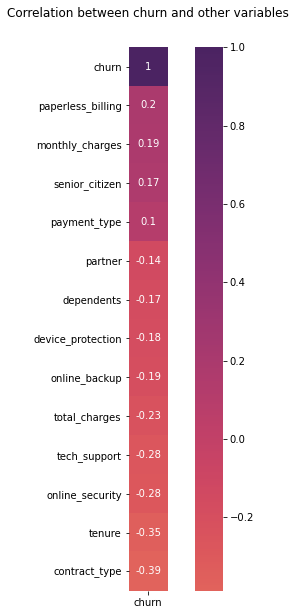

In [191]:
churn_heat = pd.DataFrame(heat.corr()['churn'])
plt.figure(figsize = [10,10])
sns.heatmap(churn_heat.sort_values(by = 'churn',ascending = False), cmap='flare', center=0, annot=True, square = True)
plt.title('Correlation between churn and other variables', pad = 30)
plt.show()

In [115]:
for x in train.columns.drop(['tenure','monthly_charges','total_charges']):
    cross = pd.crosstab(index = train['churn'], columns = train[x])
    chi, p, dof, expected = stats.chi2_contingency(cross)
    print(f'{x} values = chi : {chi}, p = {p}')

gender values = chi : 0.02915631822886831, p = 0.8644186056543403
senior_citizen values = chi : 111.11158780012808, p = 5.593212171944653e-26
partner values = chi : 80.75747229348856, p = 2.551912417490838e-19
dependents values = chi : 113.54282491801567, p = 1.640986036223241e-26
phone_service values = chi : 2.2617944337619877, p = 0.13260033423251052
multiple_lines values = chi : 13.504756020136831, p = 0.0011680985652636094
online_security values = chi : 447.01229589460195, p = 8.560778789658601e-98
online_backup values = chi : 312.7582417562411, p = 1.2173367070677348e-68
device_protection values = chi : 302.96367673238956, p = 1.6303223751223426e-66
tech_support values = chi : 437.19716195898053, p = 1.1583572700703646e-95
streaming_tv values = chi : 190.23915262345852, p = 4.898835843943658e-42
streaming_movies values = chi : 193.8729902735146, p = 7.961869722112611e-43
paperless_billing values = chi : 152.19868001232575, p = 5.733279648122047e-35
churn values = chi : 3937.871007

In [36]:
features = SelectKBest(chi2, k = ).fit(X_train, y_train)
mask = features.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
     if bool:
        new_feat.append(feature)
print(f'The best features are:{new_feat}') # The list of your 5 best features

ValueError: Input X must be non-negative.

In [23]:
feat_list = ['payment_type_id','contract_type_id','tenure','monthly_charges', 'total_charges']

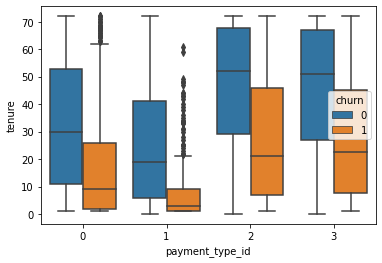

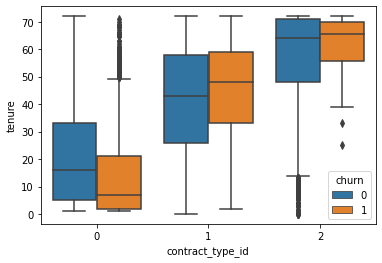

In [24]:
for x in churn_df[['payment_type_id','contract_type_id']]:
    plt.show(sns.boxplot(data = churn_df, x = churn_df[x], y = 'tenure', hue = 'churn'))

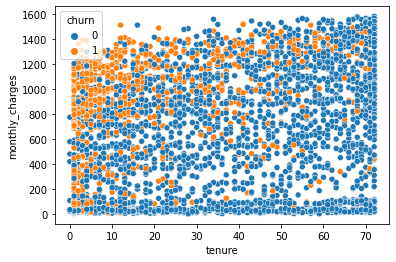

In [25]:
plt.show(sns.scatterplot(x = train['tenure'], y = train['monthly_charges'], hue = train['churn']))

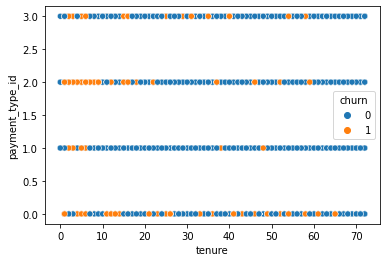

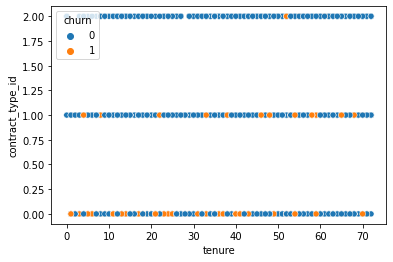

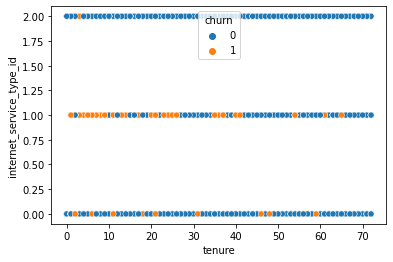

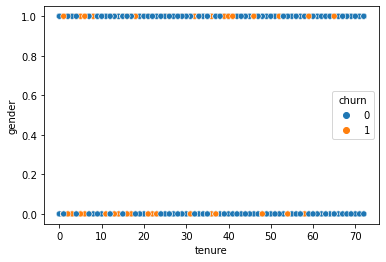

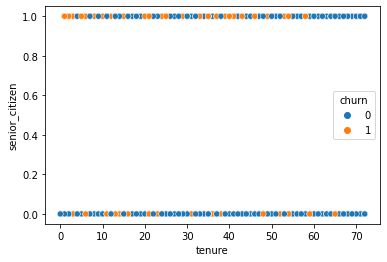

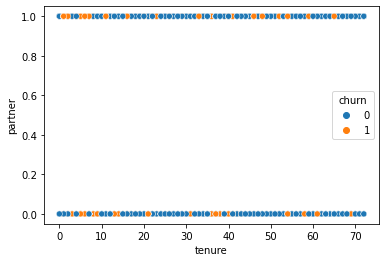

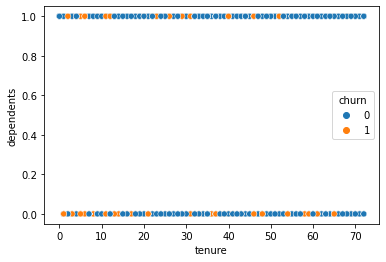

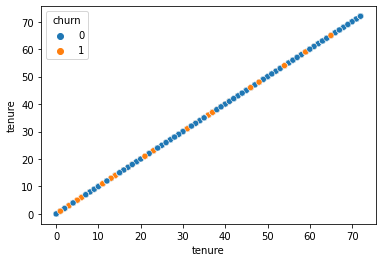

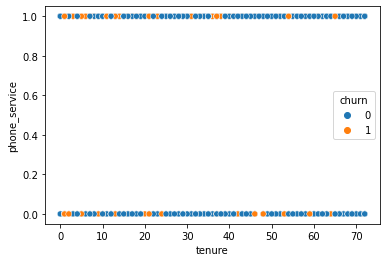

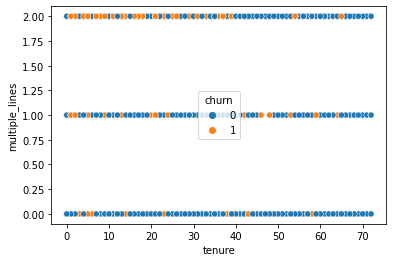

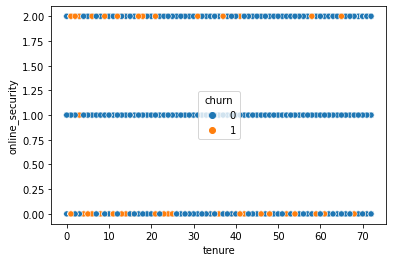

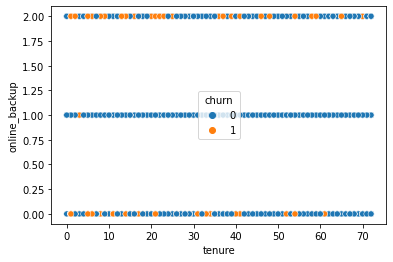

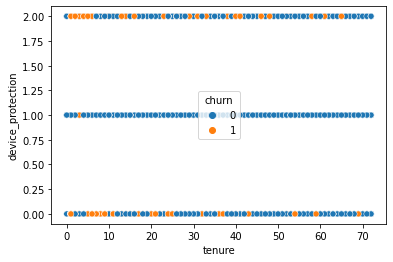

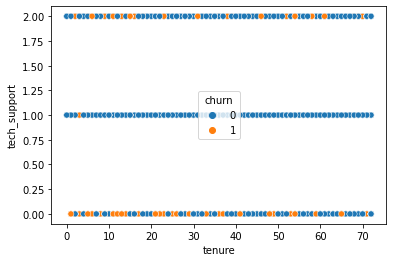

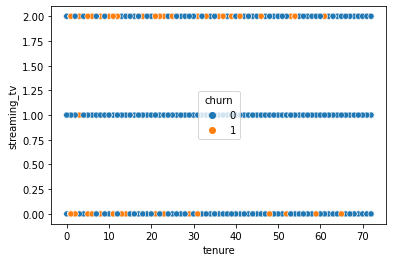

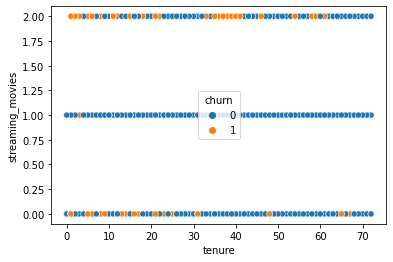

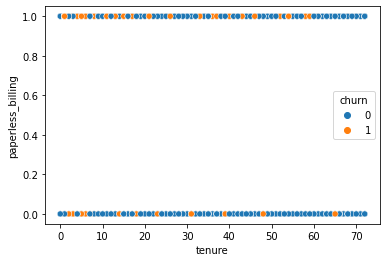

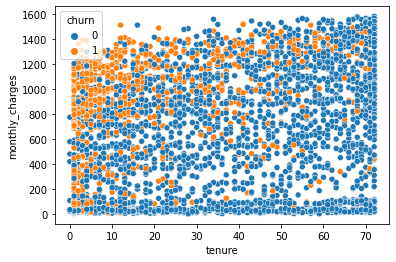

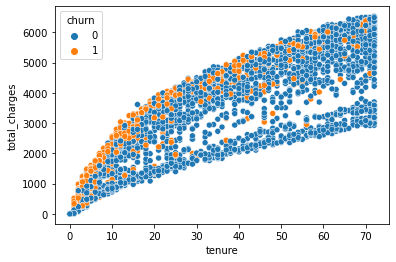

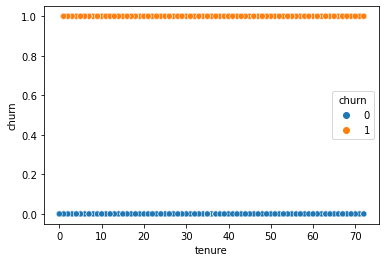

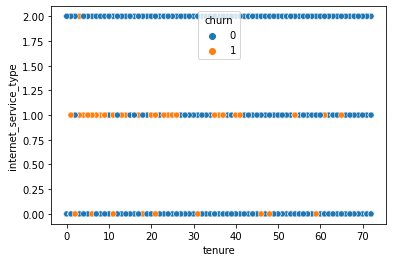

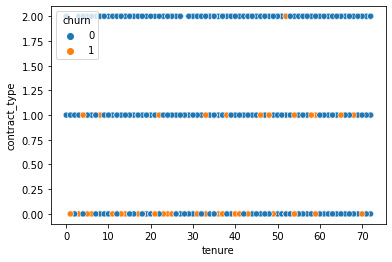

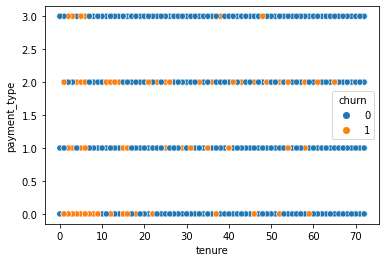

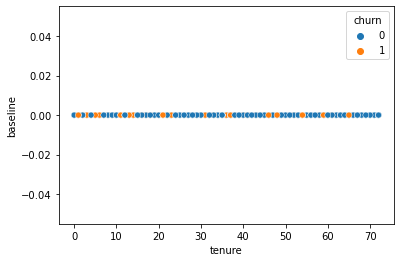

In [26]:
for x in train.columns:
    plt.show(sns.scatterplot(x = train['tenure'], y = train[x], hue = train['churn']))

In [116]:
churned = train[train['churn'] == 1]
not_churned = train[train['churn'] == 0]

In [28]:
stats.normaltest(not_churned['monthly_charges'])

NormaltestResult(statistic=7699.637815331852, pvalue=0.0)

In [29]:
stats.mannwhitneyu(churned['monthly_charges'], not_churned['monthly_charges'])

MannwhitneyuResult(statistic=1145311.0, pvalue=5.121700463478246e-32)

In [30]:
stats.mannwhitneyu(churned['total_charges'], not_churned['total_charges'])

MannwhitneyuResult(statistic=1068302.0, pvalue=8.252554630038709e-46)

In [117]:
stats.mannwhitneyu(churned['tenure'], not_churned['tenure'])

MannwhitneyuResult(statistic=797699.5, pvalue=8.060215373728185e-115)

In [134]:
strip_train = train[['monthly_charges','total_charges','tenure','churn']]

In [135]:
strmelt = strip_train.melt(id_vars = ['churn'])

In [125]:
quant_var = ['monthly_charges','total_charges','tenure']

In [126]:
def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

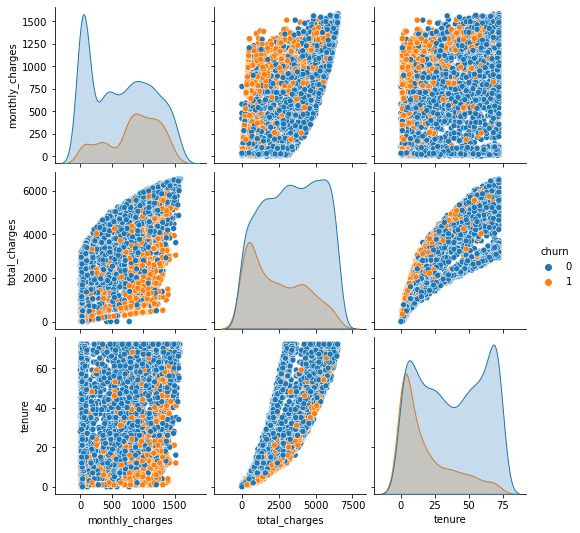

In [146]:
sns.pairplot(train, vars = ['monthly_charges','total_charges','tenure'], hue = 'churn')

In [254]:
y_col = 'churn'
X_cols = ['contract_type','online_security','tech_support']
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [255]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)

DecisionTreeClassifier()

In [256]:
prepare.run_metrics(X_train, y_train, tree1, data_set = 'train')

train data set accuracy score: 76.21%
train data set precision score 54.52%
train data set recall score: 62.33%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2897
           1       0.55      0.62      0.58      1046

    accuracy                           0.76      3943
   macro avg       0.70      0.72      0.71      3943
weighted avg       0.77      0.76      0.77      3943

-------------------------------

confusion matrix
[[2353  544]
 [ 394  652]]

train data set model metrics
---------------------------------
True positive rate for the model is 62.33%
False positive rate for the model is  18.78%
True negative rate for the model is 81.22%
False negative rate for the model is 37.67%



In [257]:
run_metrics(X_validate, y_validate, tree1, 'validate')

validate data set accuracy score: 77.35%
validate data set precision score 56.20%
validate data set recall score: 66.59%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1242
           1       0.56      0.67      0.61       449

    accuracy                           0.77      1691
   macro avg       0.72      0.74      0.73      1691
weighted avg       0.79      0.77      0.78      1691

-------------------------------

confusion matrix
[[1009  233]
 [ 150  299]]

validate data set model metrics
---------------------------------
True positive rate for the model is 66.59%
False positive rate for the model is  18.76%
True negative rate for the model is 81.24%
False negative rate for the model is 33.41%



In [42]:
print(tree1.feature_importances_)

[0.4286831  0.23781343 0.33350346]


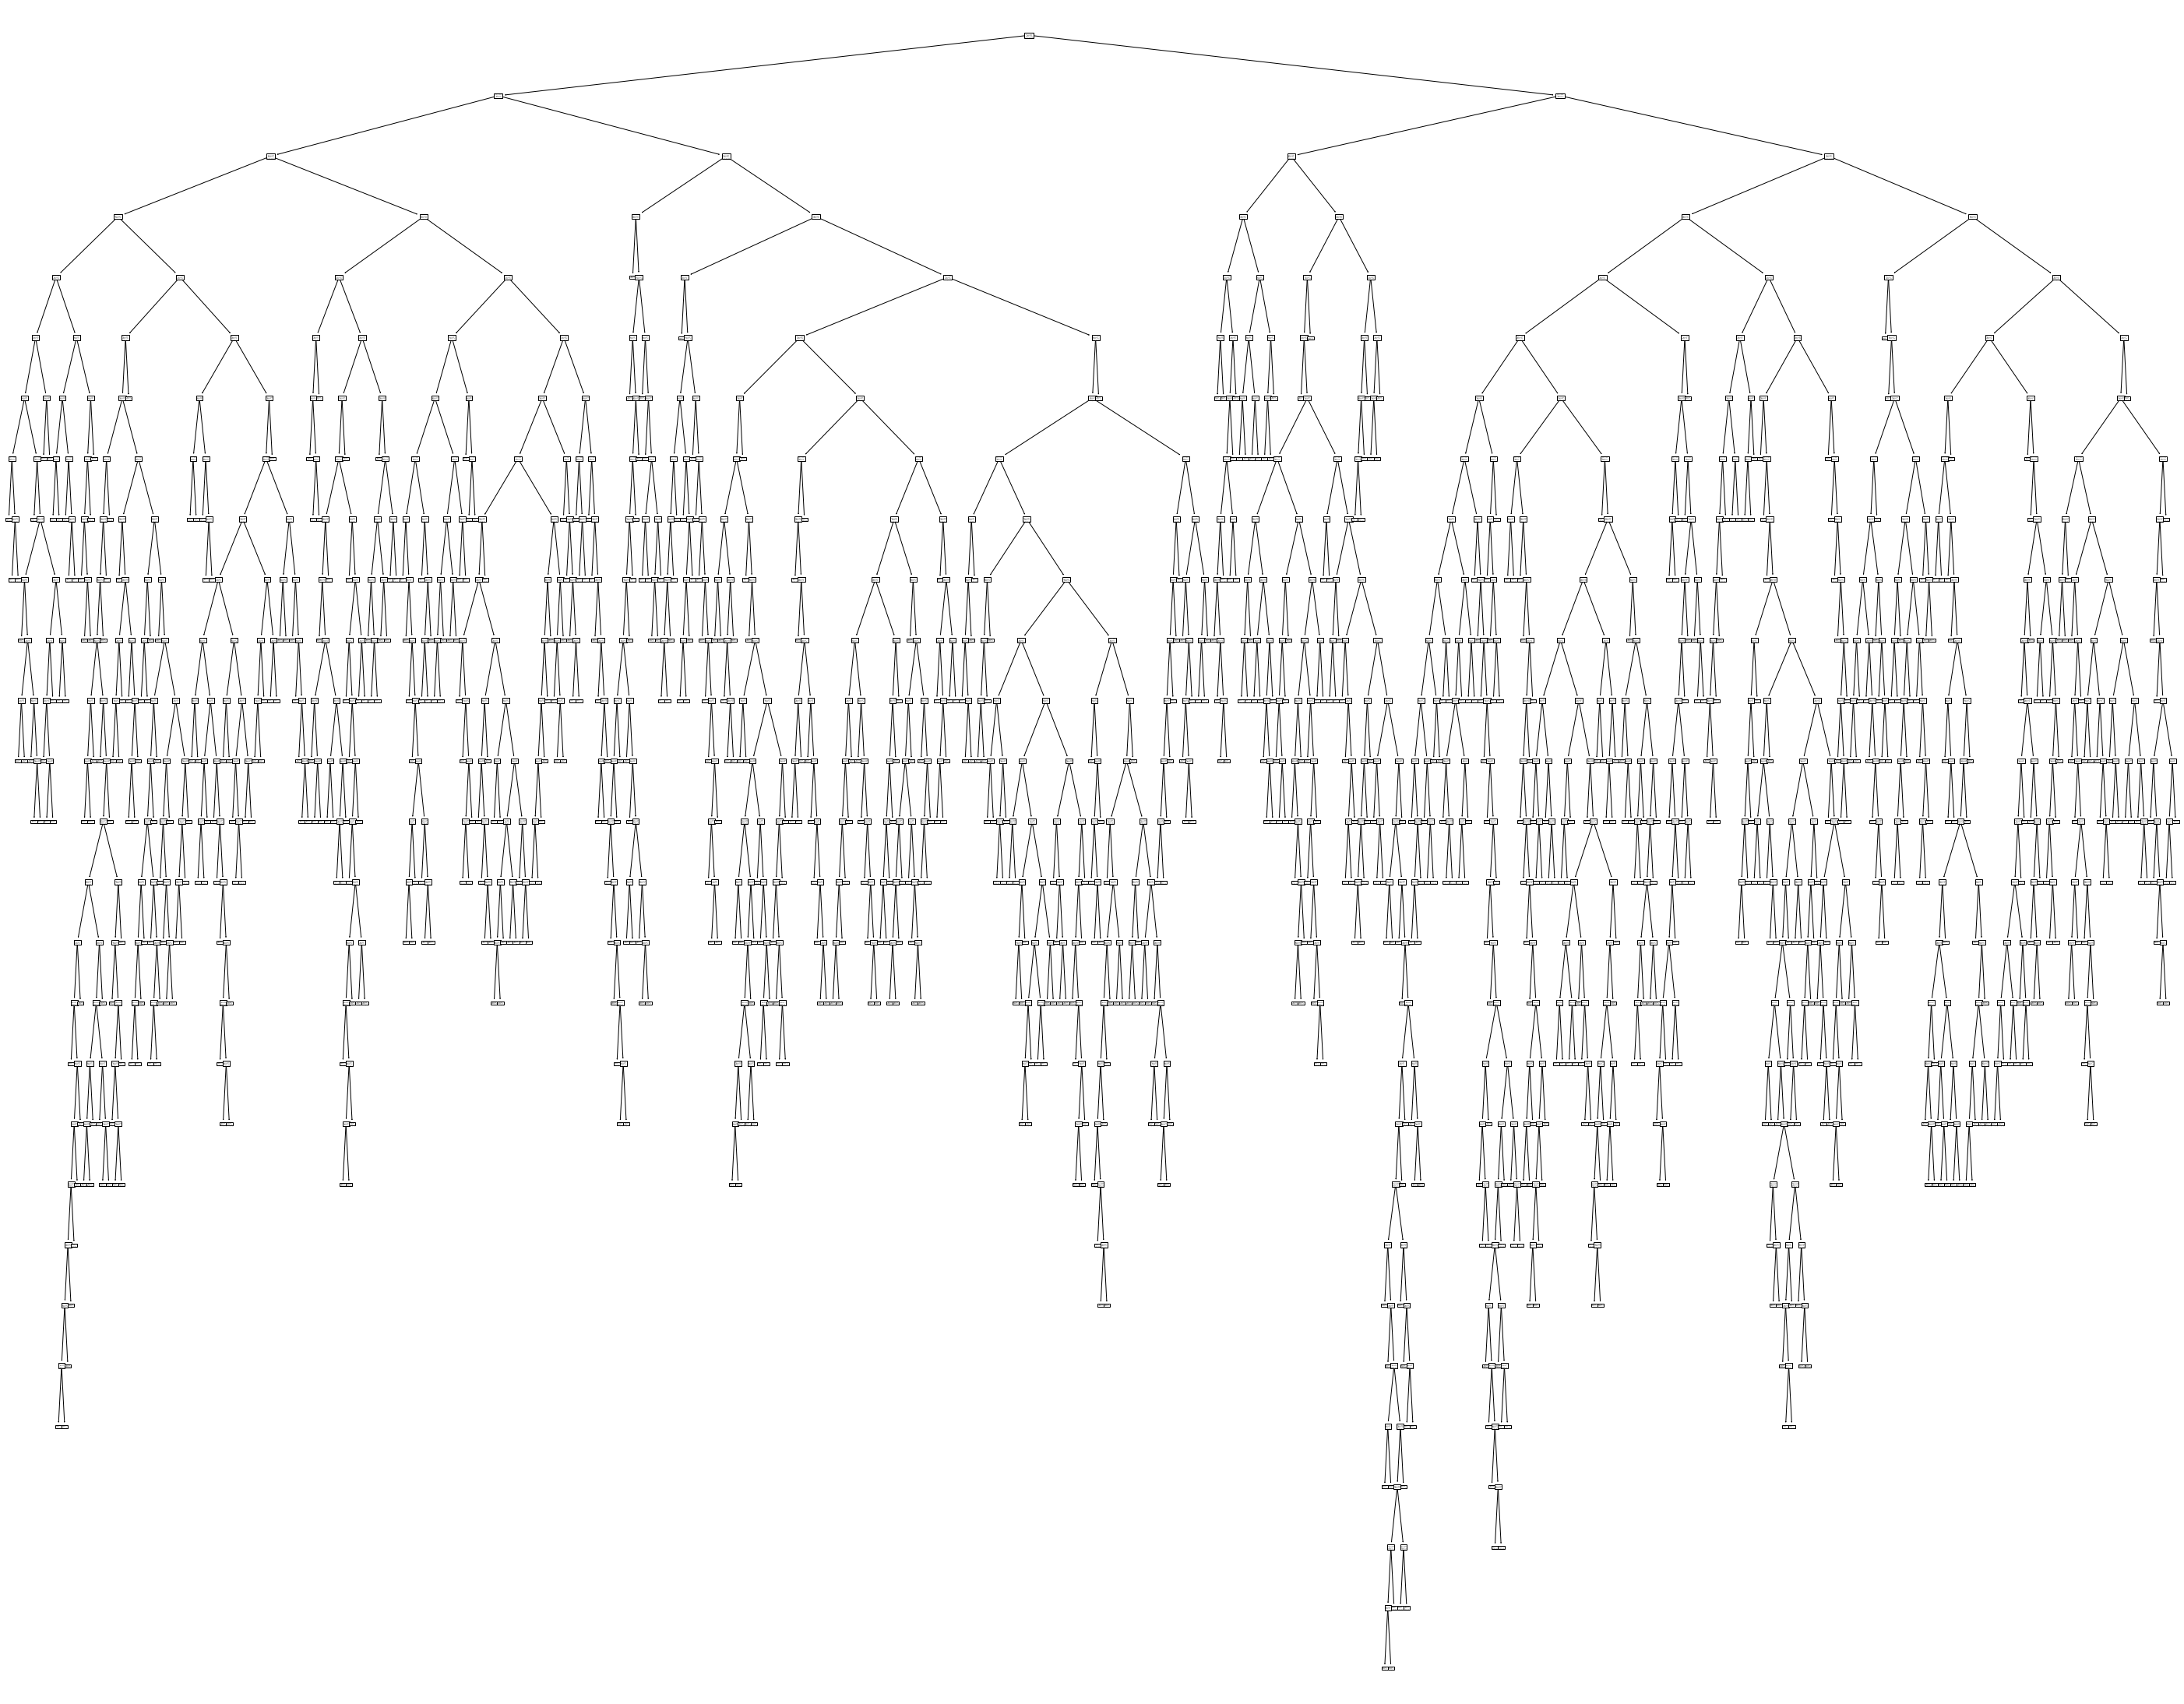

In [46]:
plt.figure(figsize = [50,40])
plt.show(plot_tree(tree1))

In [193]:
tree2 = DecisionTreeClassifier(max_depth = 7)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [241]:
run_metrics(X_train, y_train, tree2, 'train')

train data set accuracy score: 76.21%
train data set precision score 54.52%
train data set recall score: 62.33%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2897
           1       0.55      0.62      0.58      1046

    accuracy                           0.76      3943
   macro avg       0.70      0.72      0.71      3943
weighted avg       0.77      0.76      0.77      3943

-------------------------------

confusion matrix
[[2353  544]
 [ 394  652]]

train data set model metrics
---------------------------------
True positive rate for the model is 62.33%
False positive rate for the model is  18.78%
True negative rate for the model is 81.22%
False negative rate for the model is 37.67%



In [242]:
run_metrics(X_validate, y_validate, tree2, 'validate')

validate data set accuracy score: 77.35%
validate data set precision score 56.20%
validate data set recall score: 66.59%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1242
           1       0.56      0.67      0.61       449

    accuracy                           0.77      1691
   macro avg       0.72      0.74      0.73      1691
weighted avg       0.79      0.77      0.78      1691

-------------------------------

confusion matrix
[[1009  233]
 [ 150  299]]

validate data set model metrics
---------------------------------
True positive rate for the model is 66.59%
False positive rate for the model is  18.76%
True negative rate for the model is 81.24%
False negative rate for the model is 33.41%



In [258]:
rf1 = RandomForestClassifier(random_state = 123, min_samples_leaf = 1)
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [259]:
print(rf1.feature_importances_)

[0.47009946 0.27572887 0.25417167]


In [260]:
run_metrics(X_train, y_train, rf1, 'train')

train data set accuracy score: 76.21%
train data set precision score 54.52%
train data set recall score: 62.33%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2897
           1       0.55      0.62      0.58      1046

    accuracy                           0.76      3943
   macro avg       0.70      0.72      0.71      3943
weighted avg       0.77      0.76      0.77      3943

-------------------------------

confusion matrix
[[2353  544]
 [ 394  652]]

train data set model metrics
---------------------------------
True positive rate for the model is 62.33%
False positive rate for the model is  18.78%
True negative rate for the model is 81.22%
False negative rate for the model is 37.67%



In [261]:
run_metrics(X_validate, y_validate, rf1, 'validate')

validate data set accuracy score: 77.35%
validate data set precision score 56.20%
validate data set recall score: 66.59%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1242
           1       0.56      0.67      0.61       449

    accuracy                           0.77      1691
   macro avg       0.72      0.74      0.73      1691
weighted avg       0.79      0.77      0.78      1691

-------------------------------

confusion matrix
[[1009  233]
 [ 150  299]]

validate data set model metrics
---------------------------------
True positive rate for the model is 66.59%
False positive rate for the model is  18.76%
True negative rate for the model is 81.24%
False negative rate for the model is 33.41%



In [208]:
rf2 = RandomForestClassifier(random_state = 123, min_samples_leaf = 25, max_depth = 10)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, random_state=123)

In [209]:
run_metrics(X_train, y_train, rf2, 'train')

train data set accuracy score: 76.21%
train data set precision score 54.52%
train data set recall score: 62.33%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2897
           1       0.55      0.62      0.58      1046

    accuracy                           0.76      3943
   macro avg       0.70      0.72      0.71      3943
weighted avg       0.77      0.76      0.77      3943

-------------------------------

confusion matrix
[[2353  544]
 [ 394  652]]

train data set model metrics
---------------------------------
True positive rate for the model is 62.33%
False positive rate for the model is  18.78%
True negative rate for the model is 81.22%
False negative rate for the model is 37.67%



In [210]:
run_metrics(X_validate, y_validate, rf2, 'validate')

validate data set accuracy score: 77.35%
validate data set precision score 56.20%
validate data set recall score: 66.59%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1242
           1       0.56      0.67      0.61       449

    accuracy                           0.77      1691
   macro avg       0.72      0.74      0.73      1691
weighted avg       0.79      0.77      0.78      1691

-------------------------------

confusion matrix
[[1009  233]
 [ 150  299]]

validate data set model metrics
---------------------------------
True positive rate for the model is 66.59%
False positive rate for the model is  18.76%
True negative rate for the model is 81.24%
False negative rate for the model is 33.41%



In [251]:
rf3 = RandomForestClassifier(random_state = 123, min_samples_leaf = 150, max_depth = 10)
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=150, random_state=123)

In [252]:
run_metrics(X_train, y_train, rf3, 'train')

train data set accuracy score: 76.21%
train data set precision score 54.52%
train data set recall score: 62.33%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2897
           1       0.55      0.62      0.58      1046

    accuracy                           0.76      3943
   macro avg       0.70      0.72      0.71      3943
weighted avg       0.77      0.76      0.77      3943

-------------------------------

confusion matrix
[[2353  544]
 [ 394  652]]

train data set model metrics
---------------------------------
True positive rate for the model is 62.33%
False positive rate for the model is  18.78%
True negative rate for the model is 81.22%
False negative rate for the model is 37.67%



In [253]:
run_metrics(X_validate, y_validate, rf3, 'validate')

validate data set accuracy score: 77.35%
validate data set precision score 56.20%
validate data set recall score: 66.59%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1242
           1       0.56      0.67      0.61       449

    accuracy                           0.77      1691
   macro avg       0.72      0.74      0.73      1691
weighted avg       0.79      0.77      0.78      1691

-------------------------------

confusion matrix
[[1009  233]
 [ 150  299]]

validate data set model metrics
---------------------------------
True positive rate for the model is 66.59%
False positive rate for the model is  18.76%
True negative rate for the model is 81.24%
False negative rate for the model is 33.41%



In [215]:
for k in range(30, 70):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    taccuracy = knn.score(X_test, y_test)
    vaccuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: Test accuracy = {taccuracy:.2%}, Validate accuracy = {vaccuracy:.2%}')

30: Test accuracy = 77.93%, Validate accuracy = 77.59%
31: Test accuracy = 77.57%, Validate accuracy = 77.59%
32: Test accuracy = 78.28%, Validate accuracy = 77.41%
33: Test accuracy = 78.00%, Validate accuracy = 77.94%
34: Test accuracy = 78.00%, Validate accuracy = 77.59%
35: Test accuracy = 77.79%, Validate accuracy = 77.65%
36: Test accuracy = 78.00%, Validate accuracy = 78.06%
37: Test accuracy = 77.93%, Validate accuracy = 78.12%
38: Test accuracy = 78.14%, Validate accuracy = 78.24%
39: Test accuracy = 77.86%, Validate accuracy = 78.00%
40: Test accuracy = 78.00%, Validate accuracy = 78.06%
41: Test accuracy = 77.93%, Validate accuracy = 78.24%
42: Test accuracy = 77.50%, Validate accuracy = 78.00%
43: Test accuracy = 78.28%, Validate accuracy = 78.42%
44: Test accuracy = 78.21%, Validate accuracy = 78.18%
45: Test accuracy = 77.36%, Validate accuracy = 78.36%
46: Test accuracy = 77.15%, Validate accuracy = 78.12%
47: Test accuracy = 77.36%, Validate accuracy = 78.18%
48: Test a

In [234]:
knn1 = KNeighborsClassifier(n_neighbors = 6)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [235]:
run_metrics(X_train, y_train, knn1, 'train')

train data set accuracy score: 76.26%
train data set precision score 55.51%
train data set recall score: 52.96%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2897
           1       0.56      0.53      0.54      1046

    accuracy                           0.76      3943
   macro avg       0.69      0.69      0.69      3943
weighted avg       0.76      0.76      0.76      3943

-------------------------------

confusion matrix
[[2453  444]
 [ 492  554]]

train data set model metrics
---------------------------------
True positive rate for the model is 52.96%
False positive rate for the model is  15.33%
True negative rate for the model is 84.67%
False negative rate for the model is 47.04%



In [236]:
run_metrics(X_validate, y_validate, knn1,'validate')

validate data set accuracy score: 76.17%
validate data set precision score 55.37%
validate data set recall score: 52.78%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1242
           1       0.55      0.53      0.54       449

    accuracy                           0.76      1691
   macro avg       0.69      0.69      0.69      1691
weighted avg       0.76      0.76      0.76      1691

-------------------------------

confusion matrix
[[1051  191]
 [ 212  237]]

validate data set model metrics
---------------------------------
True positive rate for the model is 52.78%
False positive rate for the model is  15.38%
True negative rate for the model is 84.62%
False negative rate for the model is 47.22%



In [219]:
knn2 = KNeighborsClassifier(n_neighbors = 55)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=55)

In [220]:
run_metrics(X_train, y_train, knn2, 'train')

train data set accuracy score: 78.54%
train data set precision score 65.77%
train data set recall score: 39.87%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2897
           1       0.66      0.40      0.50      1046

    accuracy                           0.79      3943
   macro avg       0.73      0.66      0.68      3943
weighted avg       0.77      0.79      0.77      3943

-------------------------------

confusion matrix
[[2680  217]
 [ 629  417]]

train data set model metrics
---------------------------------
True positive rate for the model is 39.87%
False positive rate for the model is  7.49%
True negative rate for the model is 92.51%
False negative rate for the model is 60.13%



In [221]:
run_metrics(X_validate, y_validate, knn2, 'validate')

validate data set accuracy score: 78.06%
validate data set precision score 62.75%
validate data set recall score: 42.76%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1242
           1       0.63      0.43      0.51       449

    accuracy                           0.78      1691
   macro avg       0.72      0.67      0.68      1691
weighted avg       0.76      0.78      0.77      1691

-------------------------------

confusion matrix
[[1128  114]
 [ 257  192]]

validate data set model metrics
---------------------------------
True positive rate for the model is 42.76%
False positive rate for the model is  9.18%
True negative rate for the model is 90.82%
False negative rate for the model is 57.24%



In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [262]:
run_metrics(X_validate, y_validate, tree1, 'validate')

validate data set accuracy score: 77.35%
validate data set precision score 56.20%
validate data set recall score: 66.59%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1242
           1       0.56      0.67      0.61       449

    accuracy                           0.77      1691
   macro avg       0.72      0.74      0.73      1691
weighted avg       0.79      0.77      0.78      1691

-------------------------------

confusion matrix
[[1009  233]
 [ 150  299]]

validate data set model metrics
---------------------------------
True positive rate for the model is 66.59%
False positive rate for the model is  18.76%
True negative rate for the model is 81.24%
False negative rate for the model is 33.41%



In [263]:
run_metrics(X_test, y_test, tree1, 'test')

test data set accuracy score: 75.66%
test data set precision score 53.55%
test data set recall score: 62.57%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409

-------------------------------

confusion matrix
[[832 203]
 [140 234]]

test data set model metrics
---------------------------------
True positive rate for the model is 62.57%
False positive rate for the model is  19.61%
True negative rate for the model is 80.39%
False negative rate for the model is 37.43%



In [313]:
tree1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [302]:
ids

,customer_id,churn
0,0030-FNXPP,No
1,0031-PVLZI,Yes
2,0098-BOWSO,No
3,0107-WESLM,Yes
4,0114-RSRRW,No
...,...,...
7038,9919-FZDED,No
7039,9926-PJHDQ,No
7040,9928-BZVLZ,No
7041,9993-LHIEB,No


In [335]:
proba_tree1 = tree1.predict_proba(X_test)

In [336]:
prob_churn = pd.DataFrame(pd.DataFrame(proba_tree1)[1])

In [337]:
pred_df = prob_churn.join(pd.DataFrame(tree1.predict(X_test)))

In [338]:
pred_df.columns = ['prob_churn','pred_churn']

In [339]:
pred_df

,prob_churn,pred_churn
0,0.031579,0
1,0.316667,0
2,0.165644,0
3,0.180000,0
4,0.316667,0
...,...,...
1404,0.328244,0
1405,0.165644,0
1406,0.050847,0
1407,0.316667,0


In [340]:
pred_df.to_csv('predictions.csv')

In [334]:
pred_df

Index(['prob_churn', 'pred_churn'], dtype='object')